In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn.preprocessing as preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
# Read cleaned data

df = pd.read_csv('data/cleaned_credit_data.csv')
print(df.shape)
df.head()

(6015, 14)


Age  Annual_Income  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
0   28          34847                  2                4           0.06   
1   34         143162                  1                5           0.08   
2   34         131313                  0                1           0.08   
3   24         114838                  2                5           0.07   
4   36          54392                  6                4           0.14   

   Num_of_Loan  Delay_from_due_date  Num_of_Delayed_Payment  \
0            1                    3                       4   
1            3                    8                       6   
2            2                    0                       2   
3            3                   11                      11   
4            3                   10                       8   

   Num_Credit_Inquiries Credit_Mix  Outstanding_Debt  \
0                     2       Good               605   
1                     3       Good              1303   
2                     4       Good               352   
3                     8       Good              1377   
4                     7   Standard               179   

   Credit_Utilization_Ratio  Credit_History_Age Credit_Score  
0                      0.33                 326         Good  
1                      0.38                 220     Standard  
2                      0.29                 374         Good  
3                      0.28                 263     Standard  
4                      0.33                 329     Standard

In [5]:
df.Credit_Score.tail()

6010        Good
6011        Poor
6012    Standard
6013    Standard
6014        Poor
Name: Credit_Score, dtype: object

In [6]:
# Change credit_score to
# Poor = 0
# Standard = 1
# Good = 2
df['Credit_Score'] = df.Credit_Score.map(lambda x: 0 if x=='Poor' else 1 if x=='Standard' else 2)
df.Credit_Score.tail()

6010    2
6011    0
6012    1
6013    1
6014    0
Name: Credit_Score, dtype: int64

## Dummy Coding

In [7]:
# One Hot Encoder - Creating Dummy Variables for 'Credit_Mix

ohe = preprocessing.OneHotEncoder(sparse=False)

oh_encoded = ohe.fit_transform(df[['Credit_Mix']])
df_oh_encoded = pd.DataFrame(oh_encoded, columns=ohe.get_feature_names_out(['Credit_Mix']))

df = pd.concat([df, df_oh_encoded], axis=1)

df.drop(['Credit_Mix'], axis=1, inplace=True)

df.head()


/Users/davidekim/tensorflow/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Age  Annual_Income  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
0   28          34847                  2                4           0.06   
1   34         143162                  1                5           0.08   
2   34         131313                  0                1           0.08   
3   24         114838                  2                5           0.07   
4   36          54392                  6                4           0.14   

   Num_of_Loan  Delay_from_due_date  Num_of_Delayed_Payment  \
0            1                    3                       4   
1            3                    8                       6   
2            2                    0                       2   
3            3                   11                      11   
4            3                   10                       8   

   Num_Credit_Inquiries  Outstanding_Debt  Credit_Utilization_Ratio  \
0                     2               605                      0.33   
1                     3              1303                      0.38   
2                     4               352                      0.29   
3                     8              1377                      0.28   
4                     7               179                      0.33   

   Credit_History_Age  Credit_Score  Credit_Mix_Bad  Credit_Mix_Good  \
0                 326             2             0.0              1.0   
1                 220             1             0.0              1.0   
2                 374             2             0.0              1.0   
3                 263             1             0.0              1.0   
4                 329             1             0.0              0.0   

   Credit_Mix_Standard  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  1.0

## Scaling

In [8]:
# Standardize

scaler = preprocessing.StandardScaler()

sdf = pd.DataFrame(scaler.fit_transform(df))
sdf.columns = df.columns
sdf.head()

Age  Annual_Income  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
0 -0.839052      -0.420548          -1.245740        -0.711232      -0.929060   
1 -0.202300       2.365020          -1.629707        -0.222869      -0.699164   
2 -0.202300       2.060296          -2.013675        -2.176321      -0.699164   
3 -1.263553       1.636604          -1.245740        -0.222869      -0.814112   
4  0.009951       0.082096           0.290130        -0.711232      -0.009479   

   Num_of_Loan  Delay_from_due_date  Num_of_Delayed_Payment  \
0    -0.992321            -1.195845               -1.417453   
1    -0.167786            -0.853454               -1.102713   
2    -0.580053            -1.401279               -1.732193   
3    -0.167786            -0.648020               -0.315865   
4    -0.167786            -0.716498               -0.787974   

   Num_Credit_Inquiries  Outstanding_Debt  Credit_Utilization_Ratio  \
0             -1.128794         -0.671815                  0.107302   
1             -0.871345         -0.053747                  1.078442   
2             -0.613896         -0.895842                 -0.669611   
3              0.415898          0.011778                 -0.863839   
4              0.158450         -1.049030                  0.107302   

   Credit_History_Age  Credit_Score  Credit_Mix_Bad  Credit_Mix_Good  \
0            0.963738      1.569141       -0.530493         1.418456   
1           -0.104595      0.122646       -0.530493         1.418456   
2            1.447511      1.569141       -0.530493         1.418456   
3            0.328785      0.122646       -0.530493         1.418456   
4            0.993973      0.122646       -0.530493        -0.704992   

   Credit_Mix_Standard  
0            -0.901576  
1            -0.901576  
2            -0.901576  
3            -0.901576  
4             1.109169

In [9]:
dfKmeans = KMeans(n_clusters=3, random_state=42).fit(sdf)
dfKmeans

/Users/davidekim/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [10]:
dfCentroids = pd.DataFrame(dfKmeans.cluster_centers_)
dfCentroids.columns = sdf.columns
dfCentroids

Age  Annual_Income  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
0  0.231985       0.426746          -0.902747        -0.542409      -0.880397   
1 -0.285780      -0.486228           1.050494         1.007324       1.218275   
2 -0.022021      -0.062078           0.119346        -0.133802       0.010512   

   Num_of_Loan  Delay_from_due_date  Num_of_Delayed_Payment  \
0    -0.582945            -0.705211               -0.939982   
1     1.183988             1.258275                1.048598   
2    -0.199194            -0.145883                0.148979   

   Num_Credit_Inquiries  Outstanding_Debt  Credit_Utilization_Ratio  \
0             -0.696961         -0.562118                  0.116643   
1              1.114092          1.377674                 -0.120574   
2             -0.073442         -0.321011                 -0.023703   

   Credit_History_Age  Credit_Score  Credit_Mix_Bad  Credit_Mix_Good  \
0            0.666348      0.515431       -0.530493         1.418456   
1           -1.092497     -0.682095        1.716631        -0.704992   
2            0.085154     -0.023173       -0.530493        -0.704175   

   Credit_Mix_Standard  
0            -0.901576  
1            -0.761390  
2             1.108395

In [11]:
dfCentroids.to_csv('data/centroids.csv')

In [12]:
denormalized_centroids = scaler.inverse_transform(dfCentroids)
denormalized_centroids = pd.DataFrame(denormalized_centroids)
denormalized_centroids.columns = sdf.columns
denormalized_centroids

Age  Annual_Income  Num_Bank_Accounts  Num_Credit_Card  \
0  38.092184   67793.484469           2.893287         4.345691   
1  33.213380   32293.060563           7.980282         7.519014   
2  35.698730   48785.869950           5.555214         5.182378   

   Interest_Rate  Num_of_Loan  Delay_from_due_date  Num_of_Delayed_Payment  \
0       0.064233     1.992986            10.164830                7.034068   
1       0.246810     6.278873            38.838028               19.670423   
2       0.141739     2.923817            18.332820               13.953828   

   Num_Credit_Inquiries  Outstanding_Debt  Credit_Utilization_Ratio  \
0              3.677355        728.882766                  0.330481   
1             10.711972       2919.542254                  0.318268   
2              6.099269       1001.171604                  0.323255   

   Credit_History_Age  Credit_Score  Credit_Mix_Bad  Credit_Mix_Good  \
0          296.492986      1.271543   -2.220446e-16     1.000000e+00   
1          121.980282      0.443662    9.302817e-01    -1.665335e-16   
2          238.826856      0.899192    3.053113e-16     3.847634e-04   

   Credit_Mix_Standard  
0         1.554312e-15  
1         6.971831e-02  
2         9.996152e-01

In [13]:
df['cluster'] = pd.Series(dfKmeans.labels_)
df

Age  Annual_Income  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
0      28          34847                  2                4           0.06   
1      34         143162                  1                5           0.08   
2      34         131313                  0                1           0.08   
3      24         114838                  2                5           0.07   
4      36          54392                  6                4           0.14   
...   ...            ...                ...              ...            ...   
6010   38         139664                  3                6           0.12   
6011   38          15319                  6                7           0.15   
6012   33          59146                  3                6           0.06   
6013   29          20002                 10                8           0.29   
6014   25          39628                  4                6           0.07   

      Num_of_Loan  Delay_from_due_date  Num_of_Delayed_Payment  \
0               1                    3                       4   
1               3                    8                       6   
2               2                    0                       2   
3               3                   11                      11   
4               3                   10                       8   
...           ...                  ...                     ...   
6010            4                   14                      12   
6011            4                   54                      16   
6012            1                    8                       6   
6013            5                   33                      25   
6014            2                   18                       6   

      Num_Credit_Inquiries  Outstanding_Debt  Credit_Utilization_Ratio  \
0                        2               605                      0.33   
1                        3              1303                      0.38   
2                        4               352                      0.29   
3                        8              1377                      0.28   
4                        7               179                      0.33   
...                    ...               ...                       ...   
6010                     9               365                      0.30   
6011                     6              1453                      0.35   
6012                     5               418                      0.28   
6013                     9              3571                      0.37   
6014                     3               502                      0.34   

      Credit_History_Age  Credit_Score  Credit_Mix_Bad  Credit_Mix_Good  \
0                    326             2             0.0              1.0   
1                    220             1             0.0              1.0   
2                    374             2             0.0              1.0   
3                    263             1             0.0              1.0   
4                    329             1             0.0              0.0   
...                  ...           ...             ...              ...   
6010                 362             2             0.0              0.0   
6011                 136             0             1.0              0.0   
6012                 248             1             0.0              1.0   
6013                  75             1             1.0              0.0   
6014                 382             0             0.0              1.0   

      Credit_Mix_Standard  cluster  
0                     0.0        0  
1                     0.0        0  
2                     0.0        0  
3                     0.0        0  
4                     1.0        2  
...                   ...      ...  
6010                  1.0        2  
6011                  0.0        1  
6012                  0.0        0  
6013                  0.0        1  
6014                  0.0        0  

[6015 rows x 17 columns]

In [14]:
df['cluster'] = df['cluster'].map(lambda x : 'Good' if x==0 else 'Poor' if x==1 else 'Standard')
df

Age  Annual_Income  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
0      28          34847                  2                4           0.06   
1      34         143162                  1                5           0.08   
2      34         131313                  0                1           0.08   
3      24         114838                  2                5           0.07   
4      36          54392                  6                4           0.14   
...   ...            ...                ...              ...            ...   
6010   38         139664                  3                6           0.12   
6011   38          15319                  6                7           0.15   
6012   33          59146                  3                6           0.06   
6013   29          20002                 10                8           0.29   
6014   25          39628                  4                6           0.07   

      Num_of_Loan  Delay_from_due_date  Num_of_Delayed_Payment  \
0               1                    3                       4   
1               3                    8                       6   
2               2                    0                       2   
3               3                   11                      11   
4               3                   10                       8   
...           ...                  ...                     ...   
6010            4                   14                      12   
6011            4                   54                      16   
6012            1                    8                       6   
6013            5                   33                      25   
6014            2                   18                       6   

      Num_Credit_Inquiries  Outstanding_Debt  Credit_Utilization_Ratio  \
0                        2               605                      0.33   
1                        3              1303                      0.38   
2                        4               352                      0.29   
3                        8              1377                      0.28   
4                        7               179                      0.33   
...                    ...               ...                       ...   
6010                     9               365                      0.30   
6011                     6              1453                      0.35   
6012                     5               418                      0.28   
6013                     9              3571                      0.37   
6014                     3               502                      0.34   

      Credit_History_Age  Credit_Score  Credit_Mix_Bad  Credit_Mix_Good  \
0                    326             2             0.0              1.0   
1                    220             1             0.0              1.0   
2                    374             2             0.0              1.0   
3                    263             1             0.0              1.0   
4                    329             1             0.0              0.0   
...                  ...           ...             ...              ...   
6010                 362             2             0.0              0.0   
6011                 136             0             1.0              0.0   
6012                 248             1             0.0              1.0   
6013                  75             1             1.0              0.0   
6014                 382             0             0.0              1.0   

      Credit_Mix_Standard   cluster  
0                     0.0      Good  
1                     0.0      Good  
2                     0.0      Good  
3                     0.0      Good  
4                     1.0  Standard  
...                   ...       ...  
6010                  1.0  Standard  
6011                  0.0      Poor  
6012                  0.0      Good  
6013                  0.0      Poor  
6014                  0.0      Good  

[6015 rows x 17 c

In [15]:
df.Credit_History_Age.max()

404

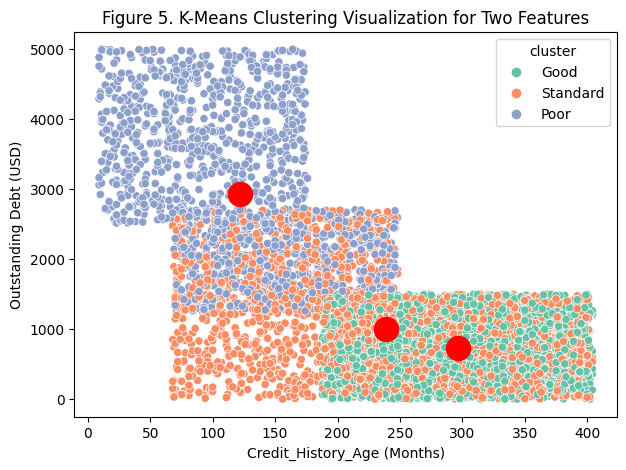

In [16]:
plt.figure(figsize=(7,5))

# Create scatterplot
sns.scatterplot(data=df, y='Outstanding_Debt', x='Credit_History_Age', hue='cluster', palette='Set2')

# Plot centroids
plt.scatter(denormalized_centroids['Credit_History_Age'], denormalized_centroids['Outstanding_Debt'], s=300, c='red')
plt.title('Figure 5. K-Means Clustering Visualization for Two Features')
plt.xlabel('Credit_History_Age (Months)')
plt.ylabel('Outstanding Debt (USD)')
plt.show()

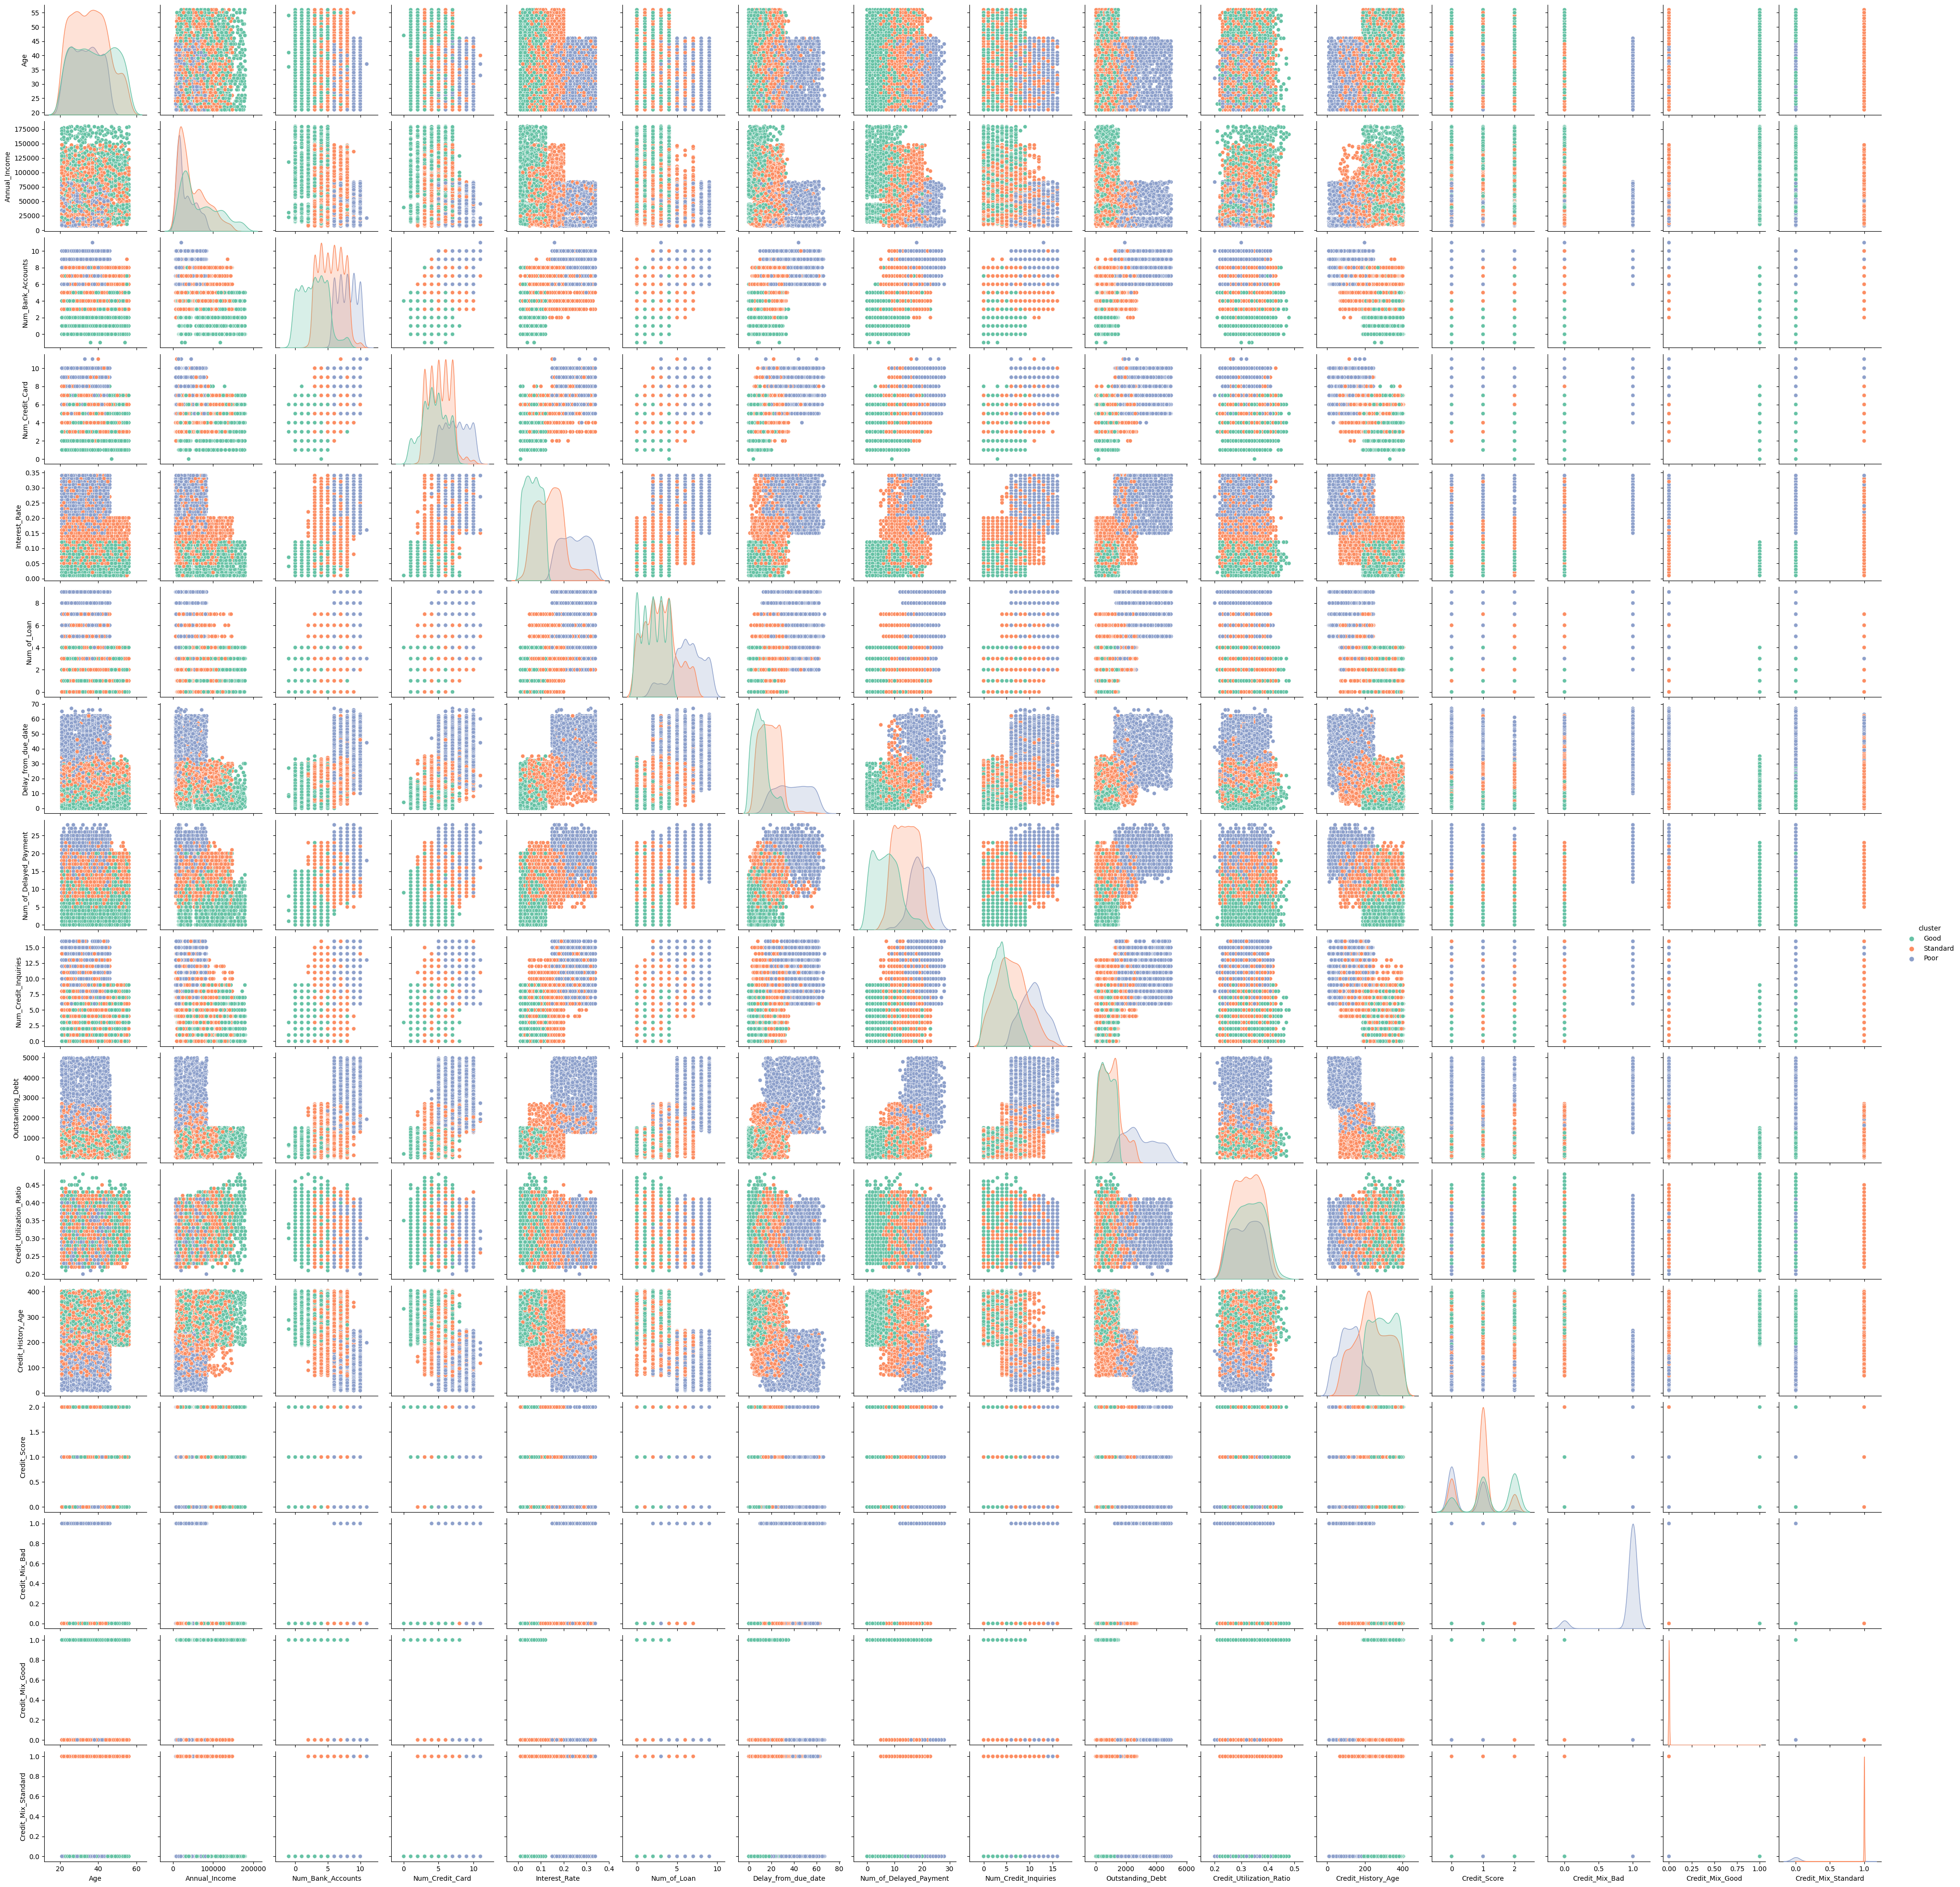

In [17]:
sns.pairplot(df, hue='cluster', palette='Set2')
plt.show()

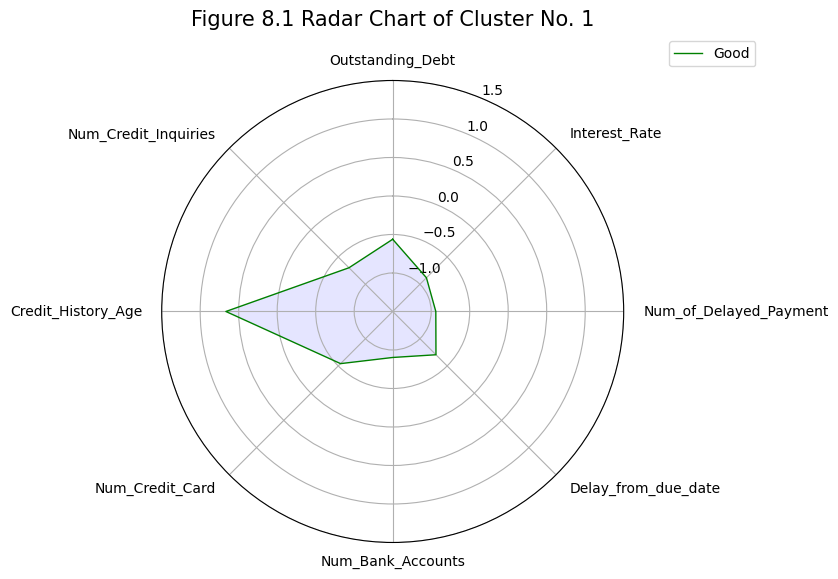

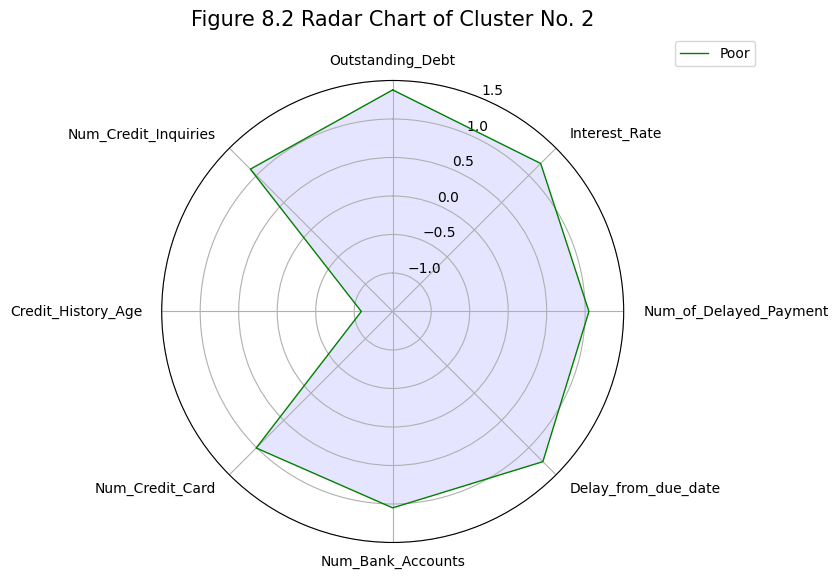

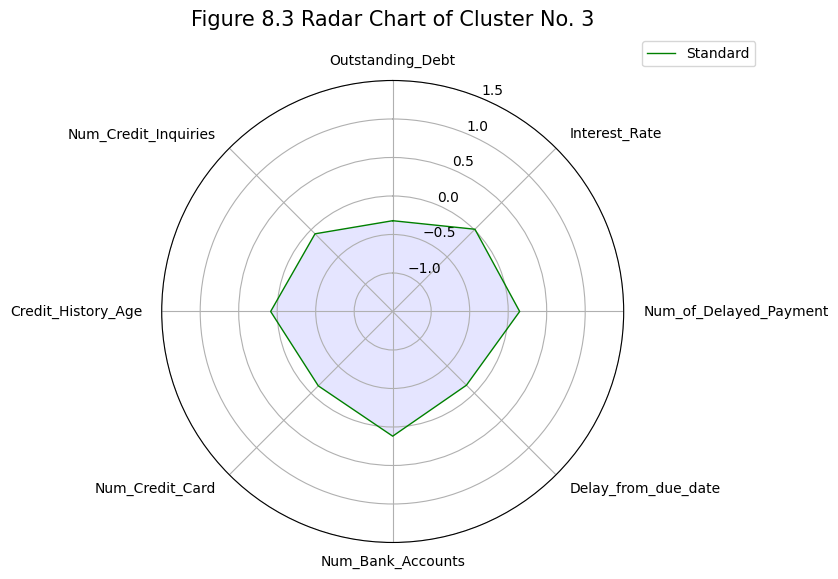

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

features = dfCentroids[['Outstanding_Debt','Interest_Rate','Num_of_Delayed_Payment', 
                            'Delay_from_due_date', 'Num_Bank_Accounts', 'Num_Credit_Card', 
                            'Credit_History_Age', 'Num_Credit_Inquiries']]

# Number of variables/features
num_vars = len(features.columns)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start to the end.
angles += angles[:1]

for idx, row in features.iterrows():
    values = row.values.flatten().tolist()
    values += values[:1] # repeat the first value to close the circle
    
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    
    if idx == 0:
        name = 'Good'
    elif idx == 1:
        name = 'Poor'
    else:
        name = 'Standard'

    ax.plot(angles, values, linewidth=1, linestyle='solid', label=name, color='green')
    ax.fill(angles, values, 'b', alpha=0.1)
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles[:-1]), features.columns)

    # Go through labels and adjust alignment based on where it is in the circle.
    for label, angle in zip(ax.get_xticklabels(), angles):
        if angle in (0, np.pi):
            label.set_horizontalalignment('center')
        elif 0 < angle < np.pi:
            label.set_horizontalalignment('left')
        else:
            label.set_horizontalalignment('right')

    ax.set_title('Figure 8.' + str(idx+1) + ' Radar Chart of Cluster No. ' + str(idx+1), size=15, color='black', y=1.1)

    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

    # Set the same y-axis limits for all plots.
    ax.set_ylim([-1.5, 1.5])

    plt.show()

In [19]:
denormalized_centroids.drop(columns='Credit_Score').to_csv('data/centroid_test.csv', index=False)

In [20]:
pd.read_csv('data/centroid_test.csv')

Age  Annual_Income  Num_Bank_Accounts  Num_Credit_Card  \
0  38.092184   67793.484469           2.893287         4.345691   
1  33.213380   32293.060563           7.980282         7.519014   
2  35.698730   48785.869950           5.555214         5.182378   

   Interest_Rate  Num_of_Loan  Delay_from_due_date  Num_of_Delayed_Payment  \
0       0.064233     1.992986            10.164830                7.034068   
1       0.246810     6.278873            38.838028               19.670423   
2       0.141739     2.923817            18.332820               13.953828   

   Num_Credit_Inquiries  Outstanding_Debt  Credit_Utilization_Ratio  \
0              3.677355        728.882766                  0.330481   
1             10.711972       2919.542254                  0.318268   
2              6.099269       1001.171604                  0.323255   

   Credit_History_Age  Credit_Mix_Bad  Credit_Mix_Good  Credit_Mix_Standard  
0          296.492986   -2.220446e-16     1.000000e+00         1.554312e-15  
1          121.980282    9.302817e-01    -1.665335e-16         6.971831e-02  
2          238.826856    3.053113e-16     3.847634e-04         9.996152e-01